In [2]:
import numpy as np
import matplotlib.pyplot as plt 

from CheckSteepestDescent_partial import get_cost, get_gradient, quadratic_problem2d,steepest_descent

# Experimentation

In [5]:
lambdas = [np.array([2, 1]),np.array([1, 1]), np.array([5, 1])]

In [11]:
def visualize_gradient_descent(Lambda):

    plt.figure(figsize=(15,5))
    plt.title(f"lambda = {Lambda}")
    global P, q, r
    np.random.seed(seed=1)
    P,q,r= quadratic_problem2d(Lambda)
    # check solution existency 
    cost = get_cost(P,q,r)
    gradient = get_gradient(P,q)
    xstar = -np.dot(np.linalg.inv(P),q)
    
    fmin  = cost(xstar)


    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]

    for test in range(2):
        x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
        #
    
        xlist,flist,nlist =  steepest_descent(x0,cost,gradient,1e-4)
        xlist = np.asarray(xlist)
        #
        fig = plt.figure(1) 
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.show()


/tmp/ipykernel_19210/1024725430.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))


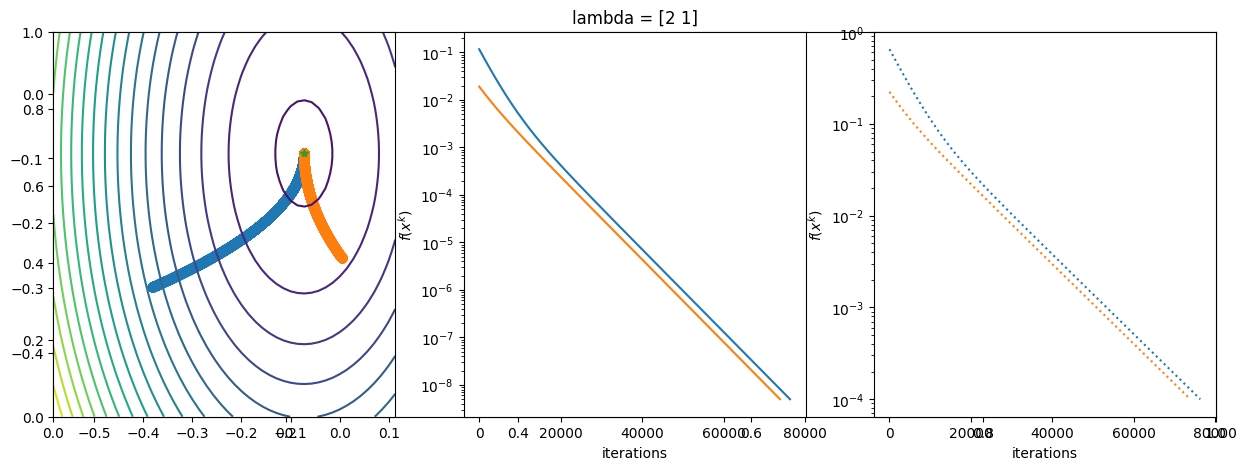

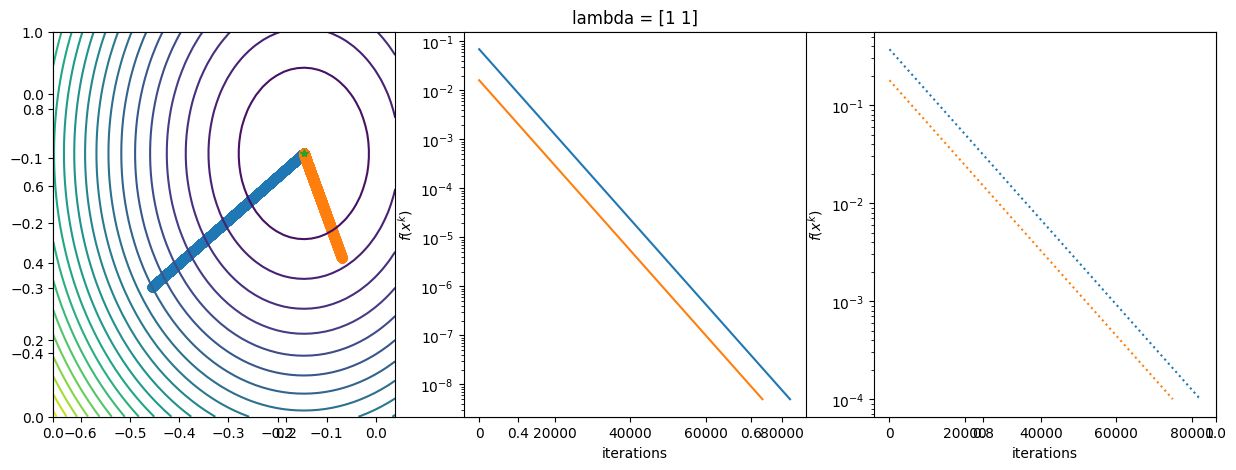

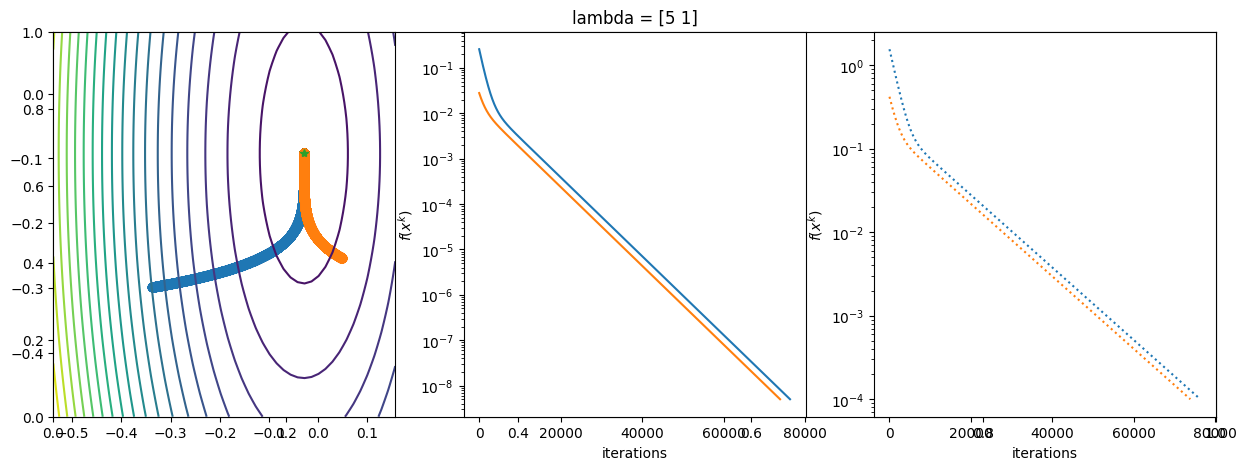

In [12]:

for Lambda in lambdas:
    visualize_gradient_descent(Lambda)